### Seaborn(https://seaborn.pydata.org)
* matplotlib을 기반으로 한 시각화 라이브러리
* 다양한 색상과 차트를 지원
* matplotlib보다 디자인적으로 우위를 가지고 있다.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rc('font', family='Malgun Gothic')#AppleGothic
plt.rcParams['figure.figsize']=(5,3)

In [4]:
tips = sns.load_dataset('tips')
tips.head()
# 총 지불 금액. 팁..

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [6]:
tips.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [7]:
tips.groupby('day').sum()

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


In [9]:
group = tips.groupby('day').count()['total_bill']
x = list(group.index) #인덱스 값이 list 로 저장
y = list(group) # value 값이 list로 저장
x,y

(['Thur', 'Fri', 'Sat', 'Sun'], [62, 19, 87, 76])

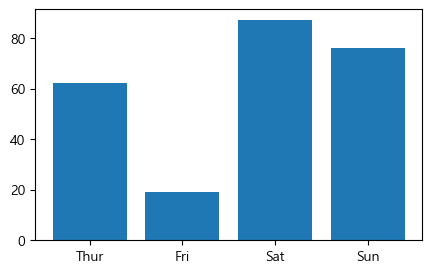

In [12]:
plt.bar(x,y)
plt.show()

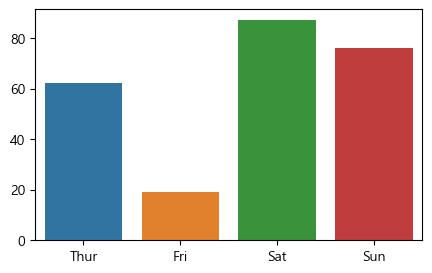

In [13]:
sns.barplot(x,y)
plt.show()

### 컬러 팔레트
* https://seaborn.pydata.org/tutorial/color_palettes.html

In [14]:
tips.groupby('day').describe()

total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   

       tip            ...                 size                                \
     count      mean  ...     75%    max count      mean       std  min  25%   
day                   ...                                                      
Thur  62.0  2.771452  ...  3.3625   6.70  62.0  2.451613  1.066285  1.0  2.0   
Fri   19.0  2.734737  ...  3.3650   4.73  19.0  2.105263  0.567131  1.0  2.0   
Sat   87.0  2.993103  ...  3.3700  10.00  87.0  2.517241  0.819275  1.0  2.0   
Sun   76.0  3.255132  ...  4.0000   6.50  76.0  2.842105  1.007341  2.0  2.0   

                     
      50%  75%  max  
day                  
Thur  2.0  2.0  6.0  
Fri   2.0  2.0  4.0  
Sat   2.0  3.0  5.0  
Sun   2.0  4.0  6.0  

[4 rows x 24 columns]

<AxesSubplot:xlabel='day'>

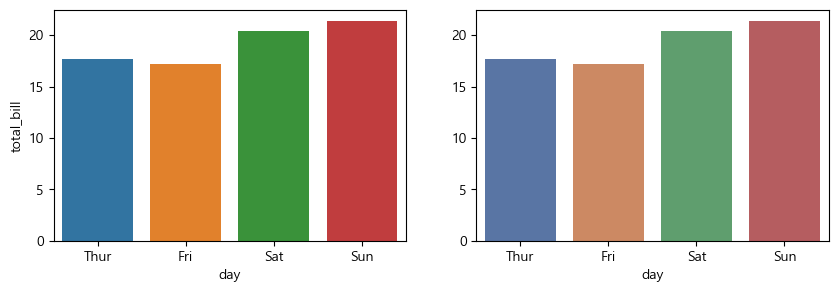

In [25]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
sns.barplot(x='day', y='total_bill', data=tips, ax=axes[0], ci=None)


data = tips.groupby('day').describe()['total_bill']['mean']
x_data = data.index
y_data = list(data)
sns.barplot(x=x_data, y=y_data, palette='deep', ax = axes[1])

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

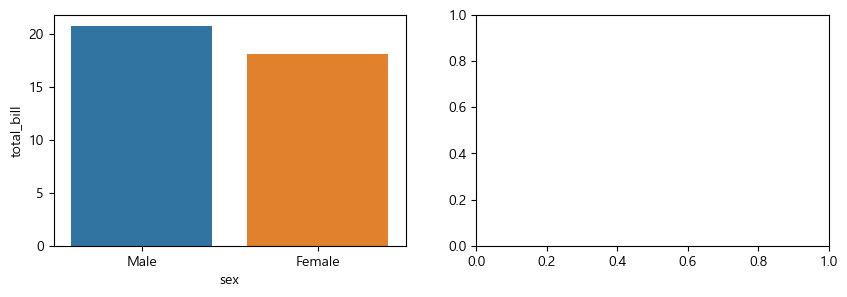

In [18]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
sns.barplot(x='sex', y='total_bill', data=tips, ax=axes[0], ci=None)

### Seaborn 그래프( https://seaborn.pydata.org/tutorial/function_overview.html )
* 그래프를 그리고자 할때는 속성값이 수치형인지, 카테고리형(범주형)인지를 파악 후 선택하는 것이 좋다

* 수치형
    * relplot : 관계를 나타내고자 할때 사용한다
        - scatterplot : 산포도(x,y를 점으로 표현)
        - lineplot : 선 그래프
    * displot : 분포를 나타내고자 할때 사용한다
* 카테고리형(범주형) 남자, 여자 등 분류가 정해져 있는 데이터
    * catplot : 카테고리형(범주형)을 표현할때 사용하며, 남자, 여자 등 분류가 정해져 있는 데이터 이용할 때 사용한다
    
>
![img](images/sns.png)

### replot
* 두 컬럼간의 관계
* hue : 그룹을 묶고자 하는 경우.
* col : scatterplot에서 사용할 수 없는 각 그룹별 그래프로 보여주는 기능

In [26]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


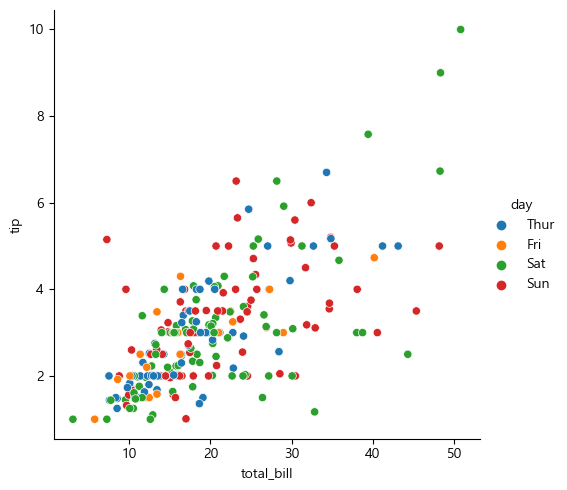

In [29]:
sns.relplot(x='total_bill', y='tip', data=tips, hue= 'day')

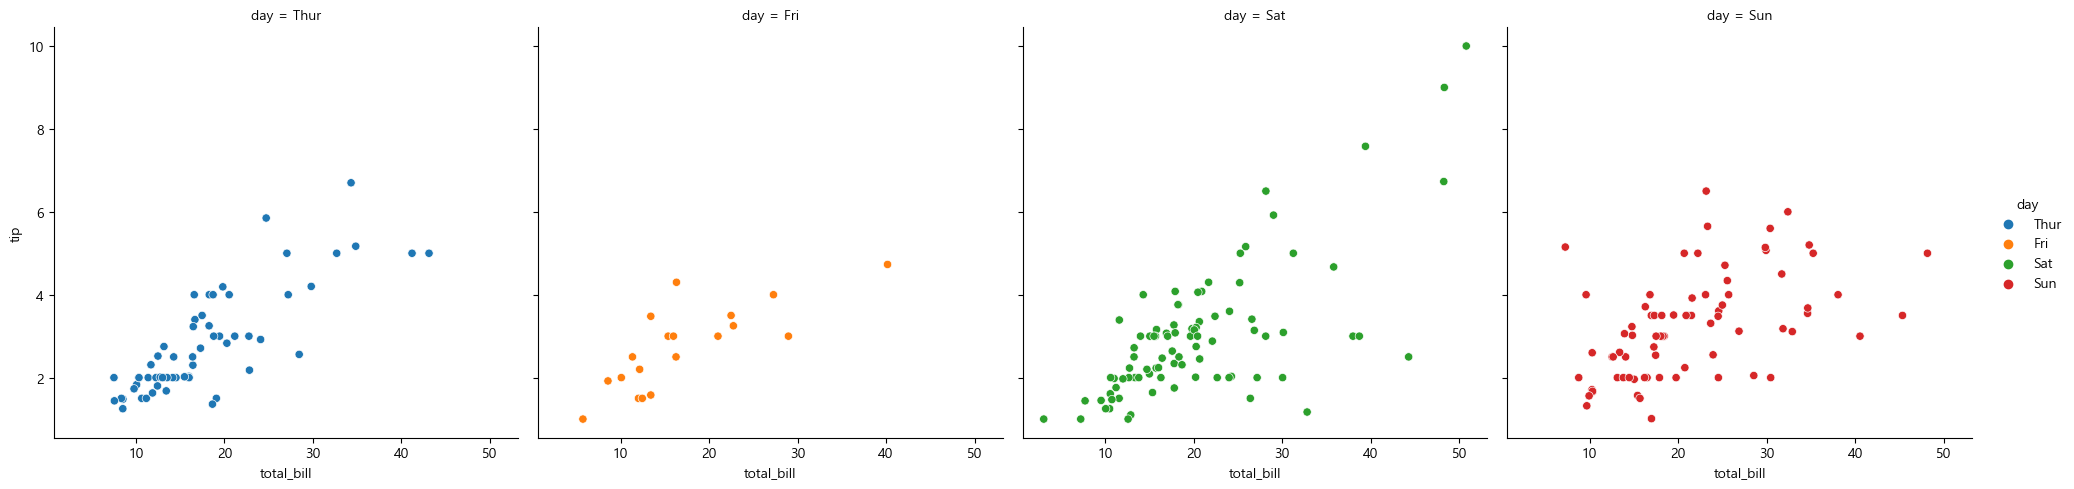

In [30]:
sns.relplot(x='total_bill', y='tip', data=tips, hue= 'day', col = 'day')

#### scatter plot
* relplot와 다르게 col을 사용할 수 없다

Text(0.5, 1.0, 'scatter-plot')

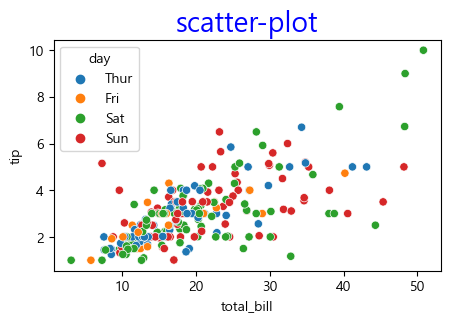

In [31]:
g = sns.scatterplot(x='total_bill', y='tip', data=tips, hue='day')
g.set_title("scatter-plot", fontsize=20, color='blue')

### line plot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

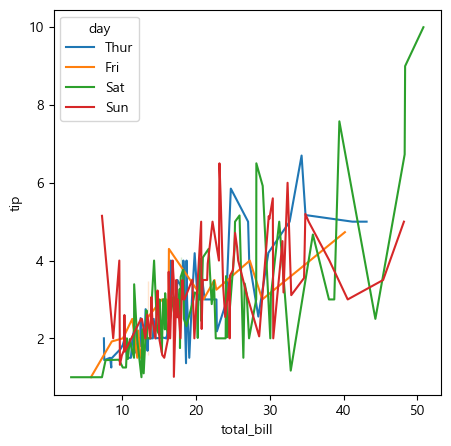

In [32]:
fig, ax = plt.subplots( figsize=(5,5))
sns.lineplot(x='total_bill', y='tip', hue='day', data=tips)

### distplot(분포를 표현할 경우)
* 데이터의 분포와 밀도를 알고 싶을 때 사용
* matplotlib의 hist + kde plot(kde는 선으로 같이 표현되는 방식. 아래 출력 결과에 나와있는 distplot에 파란색 선을 말한다)
* kdeplot : histogram보다 부드러운 형태의 분포곡선으로 나타낸다

In [33]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0.5, 1.0, 'DistPlot')

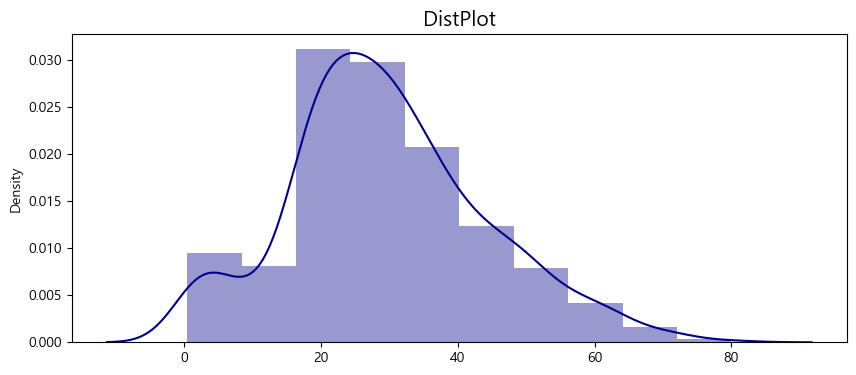

In [34]:
fig, ax = plt.subplots( figsize=(10,4))
g = sns.distplot(x=titanic['age'], color='darkblue', bins=10)
ax.set_title('DistPlot', fontsize=15)

<AxesSubplot:xlabel='age', ylabel='Count'>

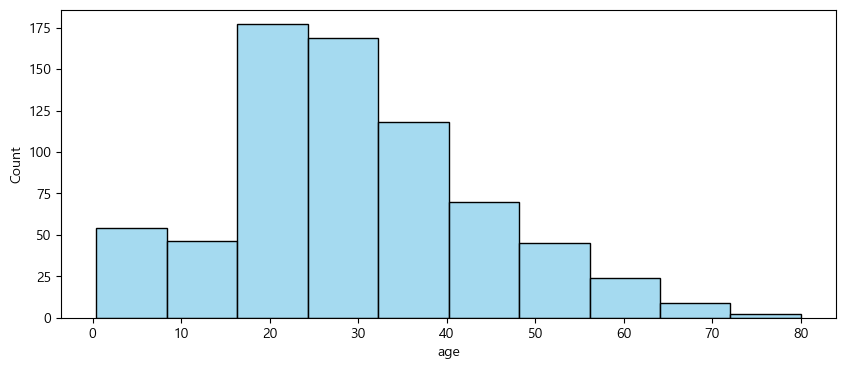

In [36]:
fig, ax = plt.subplots( figsize=(10,4))
# sns.histplot(x='age', data=titanic, color= 'skyblue', bins=10)
sns.histplot(x=titanic['age'], color='skyblue', bins=10)
sns.histplot() # shift + tab 키 누르면 뭐 넣어야할 지 알랴줌

### Categorical plot

#### bar plot
* x축에는 범주형 변수, y축에는 연속형 변수
    - 범주형 : 요일, 성별
    - 연속형 : 주식가격, 온도 , 키...
* 데이터 평균을 보여준다

<AxesSubplot:xlabel='sex', ylabel='tip'>

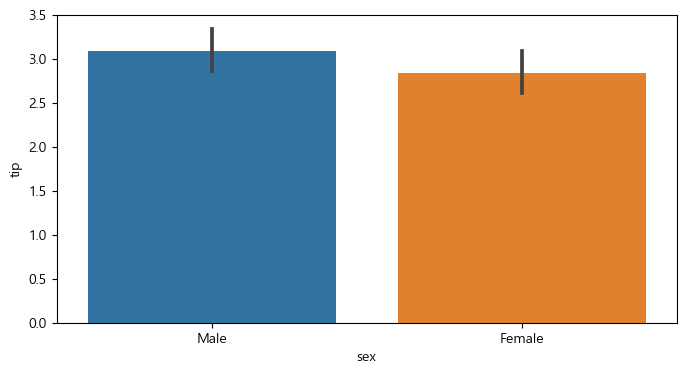

In [38]:
plt.subplots( figsize=(8,4) )
sns.barplot( x=tips['sex'], y=tips['tip'])

#### box plot
* 최대, 최소, 평균, 1/4분위를 알아볼때 사용
* 이상치 확인 가능
* x축에는 범주형, y축에는 연속형 변수

<AxesSubplot:xlabel='day', ylabel='total_bill'>

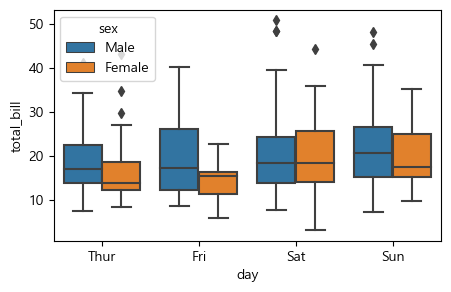

In [40]:
sns.boxplot(x='day', y='total_bill', data=tips , hue= 'sex')

### heatmap
* 수치형 컬럼관의 상관관계를 나타낸다
* corr() 상관관계를 나타내는 함수

In [41]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [42]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

<AxesSubplot:>

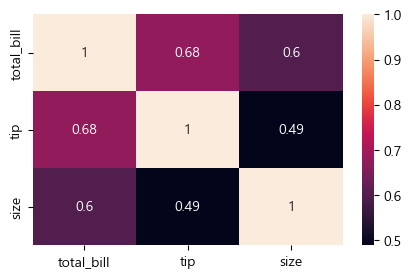

In [45]:
sns.heatmap( tips.corr(), annot = True)